# Autour du paradoxe de Simpson

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import isoweek

In [234]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"

In [235]:
raw_data = pd.read_csv(data_url)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [236]:
data = raw_data.copy()

In [237]:
fumeuse_vivante=0
fumeuse_decedee=0
non_fumeuse_vivante=0
non_fumeuse_decedee=0


for i in range(1314):
    if (data['Smoker'][i]== 'Yes') and (data['Status'][i] == 'Alive'): # si elle est fumeuse et qu'elle est vivante 
        fumeuse_vivante= fumeuse_vivante+1
        
    elif (data['Smoker'][i]== 'Yes') and (data['Status'][i] == 'Dead'): # si elle est fumeuse et qu'elle est décédée 
        fumeuse_decedee= fumeuse_decedee+1    
        
    elif (data['Smoker'][i]== 'No') and (data['Status'][i] == 'Alive'): # si elle est non fumeuse et qu'elle est vivante 
        non_fumeuse_vivante= non_fumeuse_vivante+1
        
    elif (data['Smoker'][i]== 'No') and (data['Status'][i] == 'Dead'): # si elle est non fumeuse et qu'elle est décédée
        non_fumeuse_decedee= non_fumeuse_decedee+1
        
print('fumeuse_vivante',fumeuse_vivante)
print('fumeuse_decedee',fumeuse_decedee)
print('non_fumeuse_vivante',non_fumeuse_vivante)
print('non_fumeuse_decedee',non_fumeuse_decedee)

print('nb de fumeuses', fumeuse_vivante+ fumeuse_decedee)
print('nb de non fumeuses', non_fumeuse_vivante+ non_fumeuse_decedee)




nb_femmes= fumeuse_vivante+fumeuse_decedee+non_fumeuse_vivante+non_fumeuse_decedee
print('nb femmes', nb_femmes)



fumeuse_vivante 443
fumeuse_decedee 139
non_fumeuse_vivante 502
non_fumeuse_decedee 230
nb de fumeuses 582
nb de non fumeuses 732
nb femmes 1314


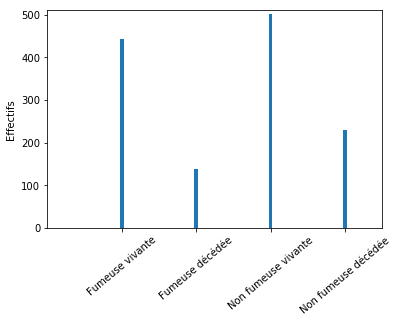

In [238]:
# Effectif dans chaque catégorie 
Nombres = {"Smoker_Alive": fumeuse_vivante, "Smoker_Dead": fumeuse_decedee, "No_Smoker_Alive": non_fumeuse_vivante, "No_Smoker_Dead": non_fumeuse_decedee}

x = [1,2,3,4]
height = [fumeuse_vivante, fumeuse_decedee, non_fumeuse_vivante, non_fumeuse_decedee]
width = 0.05
BarName = ['Fumeuse vivante', 'Fumeuse décédée', 'Non fumeuse vivante', 'Non fumeuse décédée']

plt.bar(x, height , width )

plt.xlim(0,4.5)
plt.ylim(0,510)
plt.ylabel('Effectifs ')
plt.xticks(x, BarName, rotation=40)


plt.show()

In [239]:
#Taux de mortalité

taux_mortalite_fumeuse= Nombres["Smoker_Dead"]/ (Nombres["Smoker_Dead"]+Nombres["Smoker_Alive"])
taux_mortalite_non_fumeuse= Nombres["No_Smoker_Dead"]/ (Nombres["No_Smoker_Dead"]+Nombres["No_Smoker_Alive"])

print('taux de mortalité des fumeuses',taux_mortalite_fumeuse)
print('taux de mortalité des non fumeuses',taux_mortalite_non_fumeuse)

taux de mortalité des fumeuses 0.23883161512027493
taux de mortalité des non fumeuses 0.31420765027322406


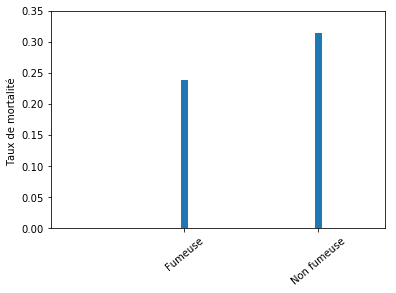

In [240]:
x = [1,2]
height = [taux_mortalite_fumeuse, taux_mortalite_non_fumeuse]
width = 0.05
BarName = ['Fumeuse', 'Non fumeuse']

plt.bar(x, height , width )

plt.xlim(0,2.5)
plt.ylim(0,0.35)

plt.ylabel('Taux de mortalité ')

plt.xticks(x, BarName, rotation=40)


plt.show()

In [241]:
#Intervalles de confiance par rapport aux taux de mortalité

print('Intervalle de confiance des fumeuses:', np.array( [taux_mortalite_fumeuse-1/np.sqrt(nb_femmes), taux_mortalite_fumeuse + 1/np.sqrt(nb_femmes)]))

print('Intervalle de confiance des non fumeuses:', np.array( [taux_mortalite_non_fumeuse-1/np.sqrt(nb_femmes), taux_mortalite_non_fumeuse + 1/np.sqrt(nb_femmes)]))

Intervalle de confiance des fumeuses: [0.21124475 0.26641848]
Intervalle de confiance des non fumeuses: [0.28662079 0.34179451]


L'intervalle de confiance de la mortalité chez les non fumeuses a des valeurs plus élévées que celui chez les fumeuses. Intuitivement, on pourrait penser le contraire. 

## Classes d'âge

In [242]:
# Effectifs selon les tranches d'âge       

catégorie1_fumeuse=0  #18-34 ans
catégorie2_fumeuse=0    # 34-54 ans
catégorie3_fumeuse=0   # 55-64 ans
catégorie4_fumeuse=0   # plus de 65 ans


catégorie1_non_fumeuse=0
catégorie2_non_fumeuse=0
catégorie3_non_fumeuse=0
catégorie4_non_fumeuse=0


 
for i in range(1314):
    
    # tranches d'age pour les fumeuses
    if (data['Smoker'][i]== 'Yes') and (18<=data['Age'][i] <=34): # si elle est fumeuse et qu'elle est dans la catégorie 1
        catégorie1_fumeuse= catégorie1_fumeuse+1
        
    elif (data['Smoker'][i]== 'Yes') and (34<data['Age'][i] <=54): # si elle est fumeuse et qu'elle est dans la catégorie 2
        catégorie2_fumeuse= catégorie2_fumeuse+1    
        
    elif (data['Smoker'][i]== 'Yes') and (54<data['Age'][i] <=64): # si elle est fumeuse et qu'elle est dans la catégorie 3
        catégorie3_fumeuse= catégorie3_fumeuse+1 
        
    elif (data['Smoker'][i]== 'Yes') and (data['Age'][i] >64): # si elle est fumeuse et qu'elle est dans la catégorie 4
        catégorie4_fumeuse= catégorie4_fumeuse+1  
        
    
    # tranches d'age pour les non fumeuses
    if (data['Smoker'][i]== 'No') and (18<=data['Age'][i] <=34): # si elle est non fumeuse et qu'elle est dans la catégorie 1
        catégorie1_non_fumeuse= catégorie1_non_fumeuse+1
        
    elif (data['Smoker'][i]== 'No') and (34<data['Age'][i] <=54): # si elle est non fumeuse et qu'elle est dans la catégorie 2
        catégorie2_non_fumeuse= catégorie2_non_fumeuse+1    
        
    elif (data['Smoker'][i]== 'No') and (54<data['Age'][i] <=64): # si elle est non fumeuse et qu'elle est dans la catégorie 3
        catégorie3_non_fumeuse= catégorie3_non_fumeuse+1 
        
    elif (data['Smoker'][i]== 'No') and (data['Age'][i] >64): # si elle est non fumeuse et qu'elle est dans la catégorie 4
        catégorie4_non_fumeuse= catégorie4_non_fumeuse+1 
        
        
print('catégorie1_fumeuse',catégorie1_fumeuse)
print('catégorie2_fumeuse',catégorie2_fumeuse)
print('catégorie3_fumeuse',catégorie3_fumeuse)
print('catégorie4_fumeuse',catégorie4_fumeuse)

print('nb_fumeuse',catégorie1_fumeuse+catégorie2_fumeuse+catégorie3_fumeuse+catégorie4_fumeuse)





print('catégorie1_non_fumeuse',catégorie1_non_fumeuse)
print('catégorie2_non_fumeuse',catégorie2_non_fumeuse)
print('catégorie3_non_fumeuse',catégorie3_non_fumeuse)
print('catégorie4_fumeuse',catégorie4_non_fumeuse)

print('nb de non fumeuse',catégorie1_non_fumeuse+catégorie2_non_fumeuse+catégorie3_non_fumeuse+catégorie4_non_fumeuse)






catégorie1_fumeuse 181
catégorie2_fumeuse 237
catégorie3_fumeuse 115
catégorie4_fumeuse 49
nb_fumeuse 582
catégorie1_non_fumeuse 219
catégorie2_non_fumeuse 199
catégorie3_non_fumeuse 121
catégorie4_fumeuse 193
nb de non fumeuse 732


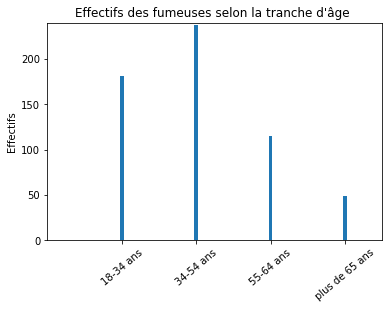

In [243]:
x = [1,2,3,4]
height = [catégorie1_fumeuse, catégorie2_fumeuse, catégorie3_fumeuse, catégorie4_fumeuse]
width = 0.05

BarName = ['18-34 ans', '34-54 ans', '55-64 ans','plus de 65 ans']

plt.bar(x, height , width )

plt.xlim(0,4.5)
plt.ylim(0,240)
#plt.grid()

plt.ylabel('Effectifs')
plt.title("Effectifs des fumeuses selon la tranche d'âge ")

plt.xticks(x, BarName, rotation=40)


plt.show()

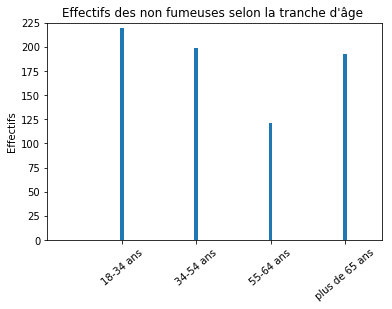

In [244]:
x = [1,2,3,4]
height = [catégorie1_non_fumeuse, catégorie2_non_fumeuse, catégorie3_non_fumeuse, catégorie4_non_fumeuse]
width = 0.05

BarName = ['18-34 ans', '34-54 ans', '55-64 ans','plus de 65 ans']

plt.bar(x, height , width )

plt.xlim(0,4.5)
plt.ylim(0,225)

plt.ylabel('Effectifs')
plt.title("Effectifs des non fumeuses selon la tranche d'âge ")

plt.xticks(x, BarName, rotation=40)


plt.show()

In [245]:
# Décès des fumeuses et des non fumeuses selon la tranche d'âge

fumeuse_decedee1=0 # fumeuse décédée de la premiere tranche d'age
fumeuse_decedee2=0 # fumeuse décédée de la premiere tranche d'age 
fumeuse_decedee3=0 # fumeuse décédée de la premiere tranche d'age
fumeuse_decedee4=0 # fumeuse décédée de la premiere tranche d'age


non_fumeuse_decedee1=0 
non_fumeuse_decedee2=0 
non_fumeuse_decedee3=0 
non_fumeuse_decedee4=0  


 
for i in range(1314):
    
    # fumeuses décédée selon la tranche d'âge  
    if (data['Smoker'][i]== 'Yes') and (data['Status'][i]== 'Dead') and (18<=data['Age'][i] <=34): # si elle est fumeuse et qu'elle est dans la catégorie 1
        fumeuse_decedee1= fumeuse_decedee1+1
        
    elif (data['Smoker'][i]== 'Yes') and (data['Status'][i]== 'Dead') and (34<data['Age'][i] <=54): # si elle est fumeuse et qu'elle est dans la catégorie 2
        fumeuse_decedee2= fumeuse_decedee2+1    
        
    elif (data['Smoker'][i]== 'Yes') and (data['Status'][i]== 'Dead') and (54<data['Age'][i] <=64): # si elle est fumeuse et qu'elle est dans la catégorie 3
        fumeuse_decedee3= fumeuse_decedee3+1 
        
    elif (data['Smoker'][i]== 'Yes') and (data['Status'][i]== 'Dead') and (data['Age'][i] >64): # si elle est fumeuse et qu'elle est dans la catégorie 4
        fumeuse_decedee4= fumeuse_decedee4+1  
        
    
    # tranches d'age pour les non fumeuses
    if (data['Smoker'][i]== 'No') and (data['Status'][i]== 'Dead') and (18<=data['Age'][i] <=34): # si elle est non fumeuse et qu'elle est dans la catégorie 1
        non_fumeuse_decedee1= non_fumeuse_decedee1+1
        
    elif (data['Smoker'][i]== 'No') and (data['Status'][i]== 'Dead') and (34<data['Age'][i] <=54): # si elle est non fumeuse et qu'elle est dans la catégorie 2
        non_fumeuse_decedee2= non_fumeuse_decedee2+1    
        
    elif (data['Smoker'][i]== 'No') and (data['Status'][i]== 'Dead') and (54<data['Age'][i] <=64): # si elle est non fumeuse et qu'elle est dans la catégorie 3
        non_fumeuse_decedee3= non_fumeuse_decedee3+1 
        
    elif (data['Smoker'][i]== 'No') and (data['Status'][i]== 'Dead') and (data['Age'][i] >64): # si elle est non fumeuse et qu'elle est dans la catégorie 4
        non_fumeuse_decedee4= non_fumeuse_decedee4+1 
        
        
print('fumeuse décédée dans la catégorie 1',fumeuse_decedee1)
print('fumeuse décédée dans la catégorie 2',fumeuse_decedee2)
print('fumeuse décédée dans la catégorie 3',fumeuse_decedee3)
print('fumeuse décédée dans la catégorie 4',fumeuse_decedee4)

print('non fumeuse décédée dans la catégorie 1',non_fumeuse_decedee1)
print('non fumeuse décédée dans la catégorie 2',non_fumeuse_decedee2)
print('non fumeuse décédée dans la catégorie 3',non_fumeuse_decedee3)
print('non fumeuse décédée dans la catégorie 4',non_fumeuse_decedee4)

fumeuse décédée dans la catégorie 1 5
fumeuse décédée dans la catégorie 2 41
fumeuse décédée dans la catégorie 3 51
fumeuse décédée dans la catégorie 4 42
non fumeuse décédée dans la catégorie 1 6
non fumeuse décédée dans la catégorie 2 19
non fumeuse décédée dans la catégorie 3 40
non fumeuse décédée dans la catégorie 4 165


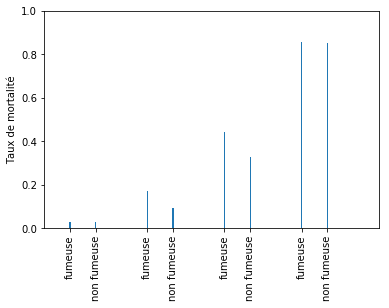

In [246]:
# taux de mortalité des fumeuses et des non fumeuses selon la tranche d'âge 

taux1_fumeuse= fumeuse_decedee1 / catégorie1_fumeuse
taux2_fumeuse= fumeuse_decedee2 / catégorie2_fumeuse
taux3_fumeuse= fumeuse_decedee3 / catégorie3_fumeuse
taux4_fumeuse= fumeuse_decedee4 / catégorie4_fumeuse

taux1_non_fumeuse= non_fumeuse_decedee1 / catégorie1_non_fumeuse
taux2_non_fumeuse= non_fumeuse_decedee2 / catégorie2_non_fumeuse
taux3_non_fumeuse= non_fumeuse_decedee3 / catégorie3_non_fumeuse
taux4_non_fumeuse= non_fumeuse_decedee4 / catégorie4_non_fumeuse



x = [1, 2, 4, 5 ,7, 8, 10, 11]
height = [taux1_fumeuse, taux1_non_fumeuse, taux2_fumeuse,taux2_non_fumeuse,taux3_fumeuse, taux3_non_fumeuse, taux4_fumeuse,taux4_non_fumeuse]
width = 0.05

BarName = ['fumeuse','non fumeuse', 'fumeuse','non fumeuse', 'fumeuse','non fumeuse','fumeuse','non fumeuse']

plt.bar(x, height , width )

plt.xlim(0,13)
plt.ylim(0,1)
#plt.grid()

plt.ylabel('Taux de mortalité')

plt.xticks(x, BarName, rotation=90)


plt.show()

#print(taux1_fumeuse>taux1_non_fumeuse, taux4_fumeuse> taux4_non_fumeuse)

Lorsqu'on observait le taux de mortalité entre les fumeuses et les non fumeuses sans prendre en compte de tranche d'age, le taux de mortalité était plus élevé chez les non fumeuses. Cette fois, on prend en compte les tranches d'age et le taux de mortalité est plus élevé chez les fumeuses. Cela peut s'expliquer par le fait que parmis l'effectif des non fumeurs est assez bien répartie sur les différentes tranches d'ages alors que celui des fumeurs est principalement concentrée avant 54 ans. 

## Régression logistique

In [247]:
Death = np.zeros((1314,1))


# 1 pour vivant 
for i in range(1314):
    if data['Status'][i]=='Alive':
        Death[i][0]=1
        

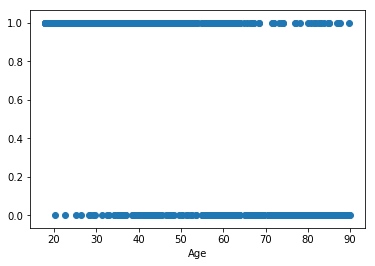

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Age0= data['Age']
Age_np=np.zeros((1314,1))

for i in range(1314):
    Age_np[i][0]= Age0[i]


plt.scatter(Age_np,Death)
plt.xlabel('Age')
plt.show()

In [249]:
x_train, x_test, y_train, y_test = train_test_split(Age_np, Death, random_state=1)
logReg= LogisticRegression()
logReg.fit(x_train,y_train)
y_pred=logReg.predict(x_test)
# matrice de confusion 
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[ 58  38]
 [ 16 217]]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


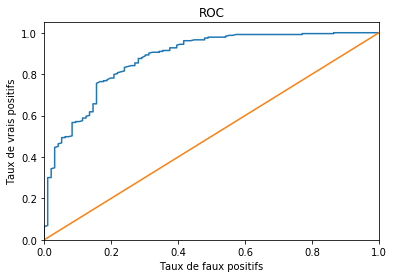

In [250]:
# courbes de régression

fpr, tpr, thresholds = roc_curve(y_test, logReg.predict_proba(x_test)[:,1])


plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1])

 
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('ROC')

 
plt.show()  
 